In [1]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
import csv


%matplotlib inline

In [2]:
#Define Predict class
predictedClassName = 'Class'

In [3]:
df = pd.read_csv("data/uploaded_file.csv", na_values="?")
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.0,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.0,0.0,0.0,NaN,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.0,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.0,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.0,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,NaN,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.0,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.0,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.0,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.0,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


## Data Pre Processing

In [4]:
with open('data/uploaded_file.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    headers = next(csv_reader)
    if predictedClassName in headers:
        headers.remove(predictedClassName)
print(headers)

['Age', 'Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Pc', 'Pcc', 'Ba', 'Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane']


## Deal with Null Values

In [5]:
df.replace("?", np.NaN)
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.0,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.0,0.0,0.0,NaN,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.0,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.0,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.0,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,NaN,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.0,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.0,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.0,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.0,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


In [6]:
df.isna().sum()

Age       234
Bp          0
Sg          0
Al          0
Su          0
Rbc         0
Pc       1672
Pcc       100
Ba        100
Bgr      1142
Bu          0
Sc          0
Sod        74
Pot         0
Hemo        0
Pcv      1845
Wbcc        0
Rbcc        0
Htn         0
Dm          0
Cad        52
Appet      26
pe         26
Ane        26
Class       0
dtype: int64

In [7]:
df.shape

(10321, 25)

In [8]:
Age = df['Age'].isna().sum()*(100/10321)
Bp = df['Bp'].isna().sum()*(100/10321)
Sg = df['Sg'].isna().sum()*(100/10321)
Al = df['Al'].isna().sum()*(100/10321)
Su = df['Su'].isna().sum()*(100/10321)
Rbc = df['Rbc'].isna().sum()*(100/10321)
Pc = df['Pc'].isna().sum()*(100/10321)
Pcc = df['Pcc'].isna().sum()*(100/10321)
Ba = df['Ba'].isna().sum()*(100/10321)
Bgr = df['Bgr'].isna().sum()*(100/10321)
Bu = df['Bu'].isna().sum()*(100/10321)
Sc = df['Sc'].isna().sum()*(100/10321)
Sod = df['Sod'].isna().sum()*(100/10321)
Pot = df['Pot'].isna().sum()*(100/10321)
Hemo = df['Hemo'].isna().sum()*(100/10321)
Pcv = df['Pcv'].isna().sum()*(100/10321)
Wbcc = df['Wbcc'].isna().sum()*(100/10321)
Rbcc = df['Rbcc'].isna().sum()*(100/10321)
Htn = df['Htn'].isna().sum()*(100/10321)
Dm = df['Dm'].isna().sum()*(100/10321)
Cad = df['Cad'].isna().sum()*(100/10321)
Appet = df['Appet'].isna().sum()*(100/10321)
pe = df['pe'].isna().sum()*(100/10321)
Ane = df['Ane'].isna().sum()*(100/10321)
Class = df['Class'].isna().sum()*(100/10321)

In [9]:
Null_Percentage = pd.DataFrame({
    'Attribute': ['Age' , 'Blood Pressure' , 'Specific Gravity' , 'Albumin' , 'Sugar' , 'Red Blood Cells' , 'Pus Cell' , 'Pus Cell Clumps' , 'Bacteria' , 'Blood Glucose Random' , 'Blood Urea' , 'Serum Creatinine' , 'Sodium' , 'Potassium' , 'Hemoglobin' , 'Packed Cell Volume' , 'White Blood Cell Count' , 'Red Blood Cell Count' , 'Hypertension' , 'Diabetes Mellitus' , 'Coronary Artery Disease' , 'Appetite' , 'Pedal Edema' , 'Anemia' , 'Class'],
    'Missing Values (%)' : [(round(Age, 2)) ,(round(Bp, 2)) ,(round(Sg, 2)),(round(Al, 2)) ,(round(Su, 2)) ,(round(Rbc, 2)) ,(round(Pc, 2)) ,(round(Pcc, 2)) ,(round(Ba, 2)) ,(round(Bgr, 2)) ,(round(Bu, 2)) ,(round(Sc, 2)) ,(round(Sod, 2)) ,(round(Pot, 2)) ,(round(Hemo, 2)) ,(round(Pcv, 2)) ,(round(Wbcc, 2)) ,(round(Rbcc, 2)) ,(round(Htn, 2)) ,(round(Dm, 2)) ,(round(Cad, 2)) ,(round(Appet, 2)) ,(round(pe, 2)) ,(round(Ane, 2)) ,(round(Class, 2))]
})
Null_Percentage.sort_values(by = 'Attribute', ascending = True)

,Attribute,Missing Values (%)
0,Age,2.27
3,Albumin,0.00
23,Anemia,0.25
21,Appetite,0.25
8,Bacteria,0.97
9,Blood Glucose Random,11.06
1,Blood Pressure,0.00
10,Blood Urea,0.00
24,Class,0.00
20,Coronary Artery Disease,0.50


In [10]:
df.fillna(round(df.mean(),2), inplace=True)
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.00,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.00,0.0,0.0,148.4,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.00,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.00,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.00,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,0.76,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.00,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.00,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.00,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.00,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


In [11]:
df.describe()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
count,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,...,10321.000000,10321.000000,10321.00000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000,10321.000000
mean,51.514615,79.623389,1.017653,1.015212,0.395020,0.880632,0.760752,0.119174,0.056196,148.401105,...,38.746028,8403.405872,4.85450,0.365201,0.345122,0.086104,0.792902,0.191933,0.151526,0.622130
std,16.948027,70.390247,0.005366,1.274018,1.034319,0.324237,0.390480,0.322427,0.229122,74.866057,...,8.085167,2534.277969,2.80735,0.480289,0.475431,0.279795,0.404730,0.393347,0.358130,0.484878
min,2.000000,0.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,0.760000,0.000000,0.000000,101.000000,...,34.000000,7000.000000,4.50000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,76.000000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,127.000000,...,38.750000,8406.000000,4.71000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.10000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,1400.000000,1.026000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,58.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     10321 non-null  float64
 1   Bp      10321 non-null  int64  
 2   Sg      10321 non-null  float64
 3   Al      10321 non-null  int64  
 4   Su      10321 non-null  int64  
 5   Rbc     10321 non-null  int64  
 6   Pc      10321 non-null  float64
 7   Pcc     10321 non-null  float64
 8   Ba      10321 non-null  float64
 9   Bgr     10321 non-null  float64
 10  Bu      10321 non-null  float64
 11  Sc      10321 non-null  float64
 12  Sod     10321 non-null  float64
 13  Pot     10321 non-null  float64
 14  Hemo    10321 non-null  float64
 15  Pcv     10321 non-null  float64
 16  Wbcc    10321 non-null  int64  
 17  Rbcc    10321 non-null  float64
 18  Htn     10321 non-null  float64
 19  Dm      10321 non-null  int64  
 20  Cad     10321 non-null  float64
 21  Appet   10321 non-null  float64
 22

In [13]:
if df[predictedClassName].dtype == float or df[predictedClassName].dtype == object:
    df[predictedClassName] = df[predictedClassName].astype('int')
df.head(10)

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.00,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.00,0.0,0.0,148.4,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.00,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.00,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.00,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
5,60.0,70,1.010,0,0,1,0.76,0.0,0.0,74.0,...,39.0,8406,4.71,0.0,1,0.0,1.0,1.0,0.0,1
6,68.0,76,1.015,2,4,1,1.00,0.0,0.0,100.0,...,36.0,6900,5.00,1.0,0,0.0,1.0,0.0,0.0,1
7,24.0,100,1.015,3,0,1,0.00,0.0,0.0,410.0,...,44.0,9600,4.00,1.0,1,0.0,1.0,1.0,0.0,1
8,52.0,90,1.020,2,0,0,0.00,1.0,0.0,138.0,...,33.0,12100,3.70,1.0,1,0.0,1.0,0.0,1.0,1
9,53.0,60,1.010,2,4,1,0.00,1.0,0.0,70.0,...,29.0,8406,4.71,1.0,1,0.0,0.0,0.0,1.0,1


# Define X and Y for Implement Models

In [14]:
X = np.asarray(df[headers])
X[0:5]

array([[4.8000e+01, 5.0000e+01, 1.0200e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.2100e+02,
        1.8000e+01, 1.2000e+00, 1.3753e+02, 4.6300e+00, 1.1300e+01,
        4.4000e+01, 6.0000e+03, 4.7100e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       [7.0000e+00, 8.0000e+01, 1.0100e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4840e+02,
        5.3000e+01, 8.0000e-01, 1.3753e+02, 4.6300e+00, 9.6000e+00,
        3.8000e+01, 7.5000e+03, 4.7100e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       [6.2000e+01, 7.0000e+01, 1.0050e+00, 4.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 4.2300e+02,
        5.6000e+01, 1.8000e+00, 1.3753e+02, 4.6300e+00, 1.1200e+01,
        3.1000e+01, 6.7000e+03, 3.9000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [4.800

In [15]:
y = np.asarray(df[predictedClassName])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Normalize Dataset

In [16]:
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

# Spliting for Train & Test Dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8256, 24) (8256,)
Test set: (2065, 24) (2065,)


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  84.65


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.model_selection import cross_val_score
cvs_lr = round((cross_val_score(logreg, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lr)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Cross Validated Score: 77.19


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [20]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       772
           1       0.87      0.89      0.88      1293

    accuracy                           0.85      2065
   macro avg       0.84      0.83      0.83      2065
weighted avg       0.85      0.85      0.85      2065



Text(0.5, 1.05, 'Confusion Matrix (Logistic Regression)')

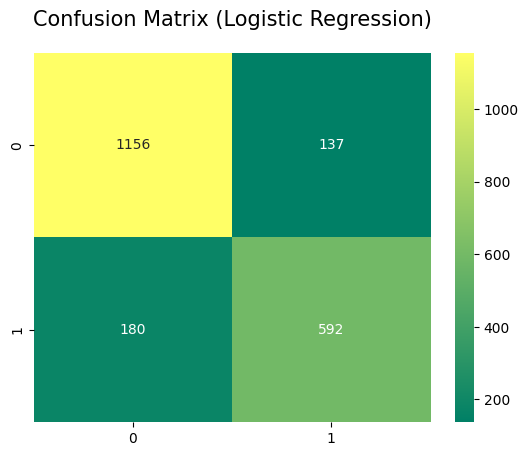

In [21]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred_lr, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Logistic Regression)', y=1.05, size=15)

In [22]:
from sklearn.metrics import jaccard_score
jac_score_logreg = round(jaccard_score(y_test, Y_pred_lr, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_logreg)

Jaccard Score:  65.13


Attribute: 0, Score: 0.03036
Attribute: 1, Score: 0.01781
Attribute: 2, Score: 0.00015
Attribute: 3, Score: 0.00586
Attribute: 4, Score: 0.00226
Attribute: 5, Score: -0.00051
Attribute: 6, Score: -0.00122
Attribute: 7, Score: 0.00004
Attribute: 8, Score: 0.00118
Attribute: 9, Score: 0.00558
Attribute: 10, Score: 0.00091
Attribute: 11, Score: -0.00647
Attribute: 12, Score: 0.00273
Attribute: 13, Score: 0.00095
Attribute: 14, Score: -0.73080
Attribute: 15, Score: 0.06601
Attribute: 16, Score: 0.00051
Attribute: 17, Score: -0.21331
Attribute: 18, Score: 0.10537
Attribute: 19, Score: 0.01397
Attribute: 20, Score: 0.00421
Attribute: 21, Score: -0.00339
Attribute: 22, Score: 0.00626
Attribute: 23, Score: 0.00594


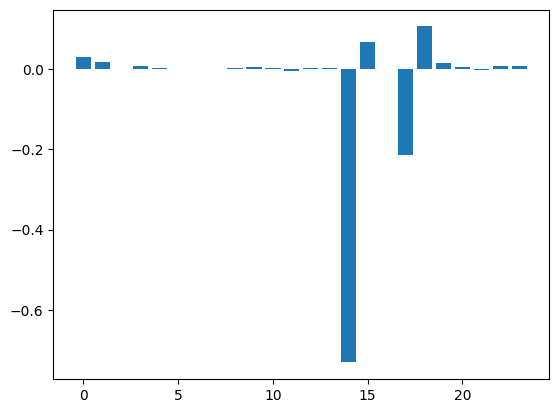

Standard Daviation of Feature Importance 0.16


In [23]:
importance_lr = logreg.coef_[0]
for i,v in enumerate(importance_lr):
    print('Attribute: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_lr))], importance_lr)
plt.show()
std_lr = round(np.std(importance_lr), 2)
print("Standard Daviation of Feature Importance", std_lr)

# Creating a logistic_reg1.sav

In [24]:
# initialize list of lists 
data = [[52,60,1.025,0,0,1,1,0,0,125,57,3.07,137,4.7,14,43,4500,5.5,0,0,0,1,0,0]] 
#65,60,1.02,1,0 1,1,0,0,150,142,1.6,142,4.3,13.6,17,10300,4.8,0,0,1,1,0,0
#48,50,1.02,4,0,1,1,0,0,121,18,1.2,137.53,4.63,11.3,44,6000,4.71,1,1,0,1,0,0 
    
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Age', 'Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Pc', 'Pcc', 'Ba','Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane']) 

#Predict On new Data
new_pred = logreg.predict(df)
new_pred

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [25]:
import pickle
import os
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/logistic_reg.sav"
pickle.dump(logreg, open(MODEL_PATH, 'wb'))

# XGBClassifier

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred_xgb = xgb.predict(X_test)
XGB_score = round(xgb.score(X_test,y_test) * 100, 2)
print("XGBoost Accuracy: ", XGB_score)

XGBoost Accuracy:  98.55


# Creating a logistic_reg1.sav

In [27]:
# initialize list of lists 
data1 = [[52,60,1.025,0,0,1,1,0,0,125,57,3.07,137,4.7,14,43,4500,5.5,0,0,0,1,0,0]] 
#65,60,1.02,1,0 1,1,0,0,150,142,1.6,142,4.3,13.6,17,10300,4.8,0,0,1,1,0,0
#48,50,1.02,4,0,1,1,0,0,121,18,1.2,137.53,4.63,11.3,44,6000,4.71,1,1,0,1,0,0 
    
# Create the pandas DataFrame 
df1 = pd.DataFrame(data1, columns = ['Age', 'Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Pc', 'Pcc', 'Ba','Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane']) 

#Predict On new Data
new_pred = logreg.predict(df1)
new_pred

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [28]:
import pickle
import os
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/XGBClassifier.sav"
pickle.dump(logreg, open(MODEL_PATH, 'wb'))

In [29]:
#print(XGBClassifier.show_versions())

In [30]:
#For future data processing 
import pandas as pd

# Create a DataFrame
data = {'Name': ['John', 'Emma', 'Peter'],
        'City': ['New York', 'London', 'Paris'],
        'Country': ['USA', 'UK', 'France']}
df = pd.DataFrame(data)

# Iterate over each column
for column in df.columns:
    # Check if column contains string values
    if df[column].dtype == object:
        # Convert string values to numeric codes
        df[column] = pd.factorize(df[column])[0] + 1

# Verify the updated DataFrame
print(df)

   Name  City  Country
0     1     1        1
1     2     2        2
2     3     3        3
